In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns


import urllib.request

#  Description of Data
The data is sourced from the Inside Airbnb website http://insideairbnb.com/get-the-data.html which hosts publicly available data from the Airbnb site.

The dataset comprises of listings_2 table:

listings - Detailed listings data showing 96 atttributes for each of the listings. Some of the attributes used in the analysis are price (continuous), longitude (continuous), latitude (continuous), listing_type (categorical), is_superhost (categorical), neighbourhood (categorical), ratings (continuous) among others.

A quick glance at the data shows that there are:

45756 unique listing in NYC in total.
The price for a listing ranges from $0 per night to $1000(!) per night. Listing with $1000 price tag are in Greenpoint, Brooklyn; Astoria, Queens and Upper West Side, Manhattan.

In [2]:
new_df=pd.read_csv('./listings.csv', usecols=['host_id','host_is_superhost','host_total_listings_count',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude','room_type', 'price','minimum_nights','availability_365', 
        'number_of_reviews','review_scores_rating', 'review_scores_location'])
new_df.head(3)

,host_id,host_is_superhost,host_total_listings_count,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,room_type,price,minimum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_location
0,2845,f,6.0,Midtown,Manhattan,40.75362,-73.98377,Entire home/apt,$175.00,3,365,48,94.0,10.0
1,4869,f,1.0,Clinton Hill,Brooklyn,40.68514,-73.95976,Entire home/apt,$76.00,1,2,354,89.0,9.0
2,7356,f,1.0,Bedford-Stuyvesant,Brooklyn,40.68688,-73.95596,Private room,$60.00,29,2,50,90.0,9.0


In [3]:
len(new_df)

44666

In [4]:
new_df.shape

(44666, 14)

## Data cleaning

In [5]:
# check to be sure  desired outcome is in place
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44666 entries, 0 to 44665
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   host_id                       44666 non-null  int64  
 1   host_is_superhost             44649 non-null  object 
 2   host_total_listings_count     44649 non-null  float64
 3   neighbourhood_cleansed        44666 non-null  object 
 4   neighbourhood_group_cleansed  44666 non-null  object 
 5   latitude                      44666 non-null  float64
 6   longitude                     44666 non-null  float64
 7   room_type                     44666 non-null  object 
 8   price                         44666 non-null  object 
 9   minimum_nights                44666 non-null  int64  
 10  availability_365              44666 non-null  int64  
 11  number_of_reviews             44666 non-null  int64  
 12  review_scores_rating          33102 non-null  float64
 13  r

In [6]:
new_df.isnull().sum()

host_id                             0
host_is_superhost                  17
host_total_listings_count          17
neighbourhood_cleansed              0
neighbourhood_group_cleansed        0
latitude                            0
longitude                           0
room_type                           0
price                               0
minimum_nights                      0
availability_365                    0
number_of_reviews                   0
review_scores_rating            11564
review_scores_location          11616
dtype: int64

In [7]:
#replacing all NaN values in review_scores_rating with review_scores_rating median()

new_df.fillna({'review_scores_rating':new_df.review_scores_rating.median()}, inplace=True)
#examing changes
new_df.isnull().sum()

host_id                             0
host_is_superhost                  17
host_total_listings_count          17
neighbourhood_cleansed              0
neighbourhood_group_cleansed        0
latitude                            0
longitude                           0
room_type                           0
price                               0
minimum_nights                      0
availability_365                    0
number_of_reviews                   0
review_scores_rating                0
review_scores_location          11616
dtype: int64

In [8]:
#replacing all NaN values in review_scores_rating with review_scores_rating mean()
new_df.fillna({'review_scores_location':new_df.review_scores_location.median()}, inplace=True)
#examing changes
new_df.isnull().sum()

host_id                          0
host_is_superhost               17
host_total_listings_count       17
neighbourhood_cleansed           0
neighbourhood_group_cleansed     0
latitude                         0
longitude                        0
room_type                        0
price                            0
minimum_nights                   0
availability_365                 0
number_of_reviews                0
review_scores_rating             0
review_scores_location           0
dtype: int64

In [64]:
#To drop any rows that have missing data.
#better_df.host_is_superhost.dropna(inplace=True, how='all')
new_df=new_df[new_df.host_is_superhost.notna()]

In [65]:
new_df.isnull().sum()

host_id                         0
host_is_superhost               0
host_total_listings_count       0
neighbourhood_cleansed          0
neighbourhood_group_cleansed    0
latitude                        0
longitude                       0
room_type                       0
price                           0
minimum_nights                  0
availability_365                0
number_of_reviews               0
review_scores_rating            0
review_scores_location          0
dtype: int64

In [11]:
import locale
locale.setlocale(locale.LC_ALL,'')
new_df['price']=new_df.price.map(lambda x: locale.atof(x.strip('$')))

In [12]:
new_df.price.dtype

dtype('float64')

In [13]:
new_df.price.isnull().sum()

0

In [14]:
new_df.price.shape

(44649,)

In [28]:
#new_df.fillna({'price':new_df.price.median()}, inplace=True)

# Which is rated the best?

In [20]:
sub_ratings=new_df[new_df.review_scores_location >=9.0]

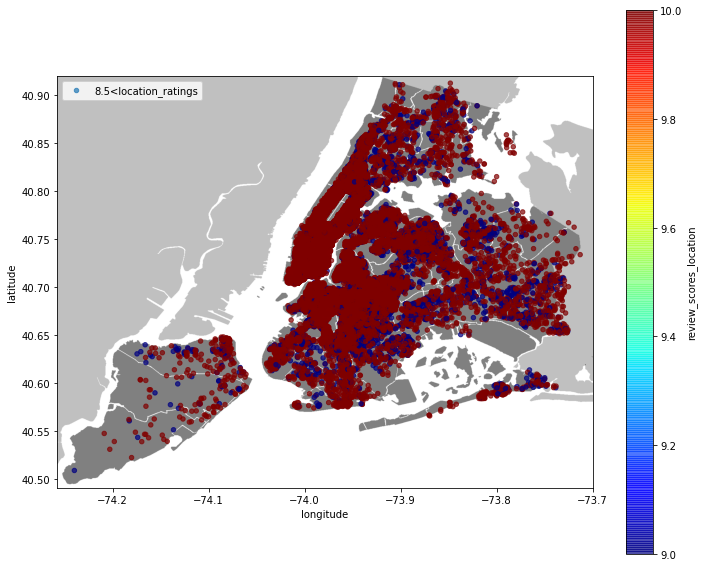

In [21]:
nyc_img=Image.open('nyc.png')
plt.figure(figsize=(12,10))
# #scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
sub_ratings.plot(kind='scatter', x='longitude', y='latitude', label='8.5<location_ratings', c='review_scores_location', ax=ax,
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.7, zorder=5)
plt.legend()
plt.show()

 # WHICH AREA IS  PRICED HIGHER -->

In [59]:
# lets figure out the median price for  each borough
median_price = new_df.groupby('neighbourhood_group_cleansed')['price'].mean().sort_values(ascending=False)
median_price

neighbourhood_group_cleansed
Manhattan        194.118357
Brooklyn         120.356266
Staten Island    112.634204
Queens           103.838304
Bronx             91.884125
Name: price, dtype: float64

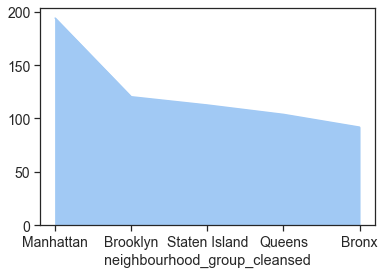

In [63]:
median_price.plot(kind='area', fontsize=14);

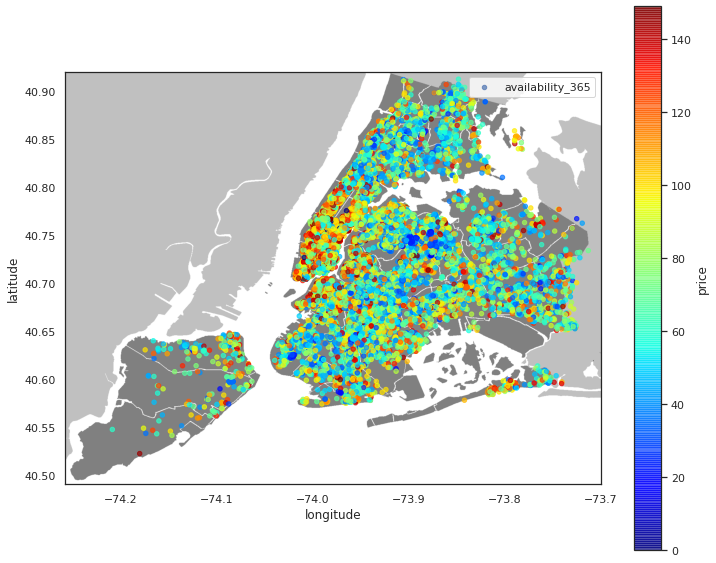

In [29]:
sub_price=new_df[new_df.price<150] 
nyc_img=Image.open('nyc.png')
plt.figure(figsize=(12,10))
# #scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
sub_price.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.7, zorder=5)

plt.legend()
plt.show()

# Listings types distribution in NYC

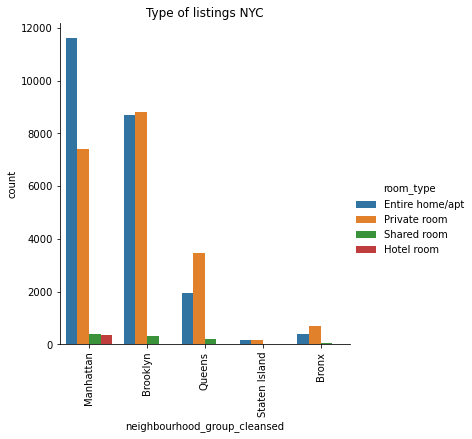

In [17]:
listings_types=sns.catplot(x='neighbourhood_group_cleansed', hue='room_type', data=new_df, kind='count')
plt.title('Type of listings NYC', fontsize=12)
listings_types.set_xticklabels(rotation=90)
plt.show()

# lets see parameters dependens

<AxesSubplot:>

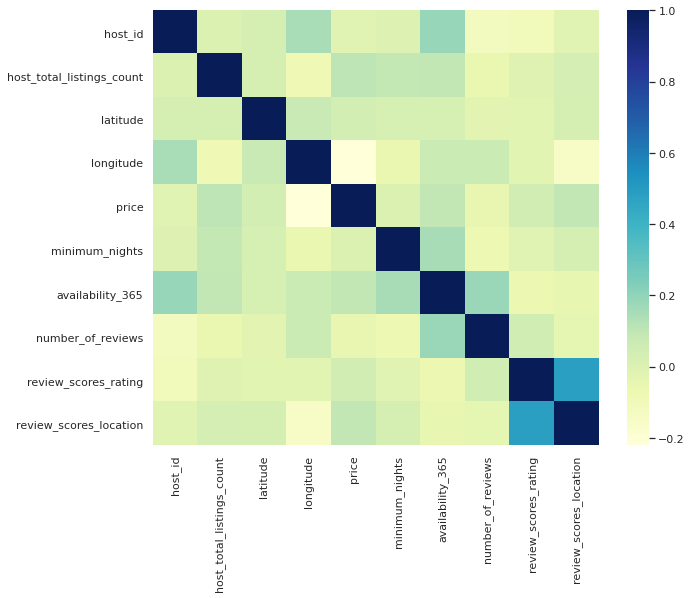

In [126]:
sns.heatmap(new_df.corr(), cmap="YlGnBu")

# Superhost requirements

Completed at least 10 trips OR completed 3 reservations that total at least 100 nights
Maintained a 90% response rate or higher
Maintained a 1% percent cancellation rate (1 cancellation per 100 reservations) or lower, with exceptions made for those that fall under our Extenuating Circumstances policy
Maintained a 4.8 overall rating (this rating looks at the past 365 days of reviews, based on the date the guest left a review, not the date the guest checked out)

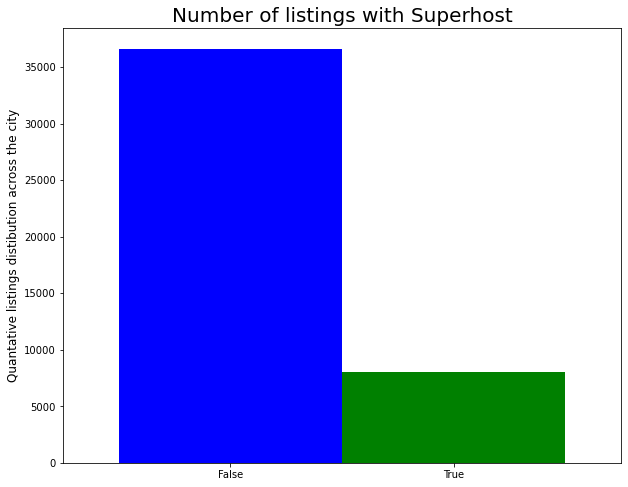

In [18]:
new_df.host_is_superhost = new_df.host_is_superhost.replace({"t": 'True', "f": "False"})
feq=new_df['host_is_superhost'].value_counts()
feq.plot.bar(figsize=(10, 8), color=['blue', 'green'], width=1, rot=0)
plt.title("Number of listings with Superhost", fontsize=20)
plt.ylabel('Quantative listings distibution across the city', fontsize=12)
plt.show()

In [58]:
feq

False    36633
True      8016
Name: host_is_superhost, dtype: int64

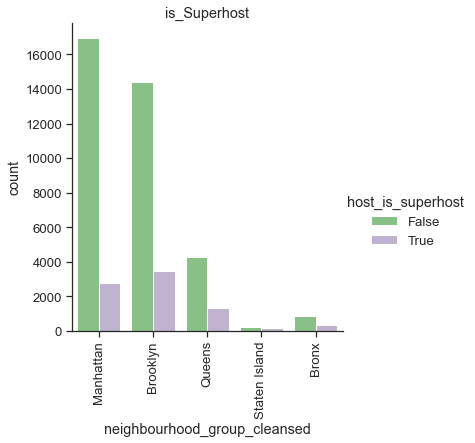

In [57]:
#true_superhost=new_df.loc[new_df['host_is_superhost'].isin(['True'])]

superhost_loc=sns.catplot(x='neighbourhood_group_cleansed', hue='host_is_superhost', data=new_df, palette='Accent',kind='count')
plt.title('is_Superhost')
superhost_loc.set_xticklabels(rotation=90);

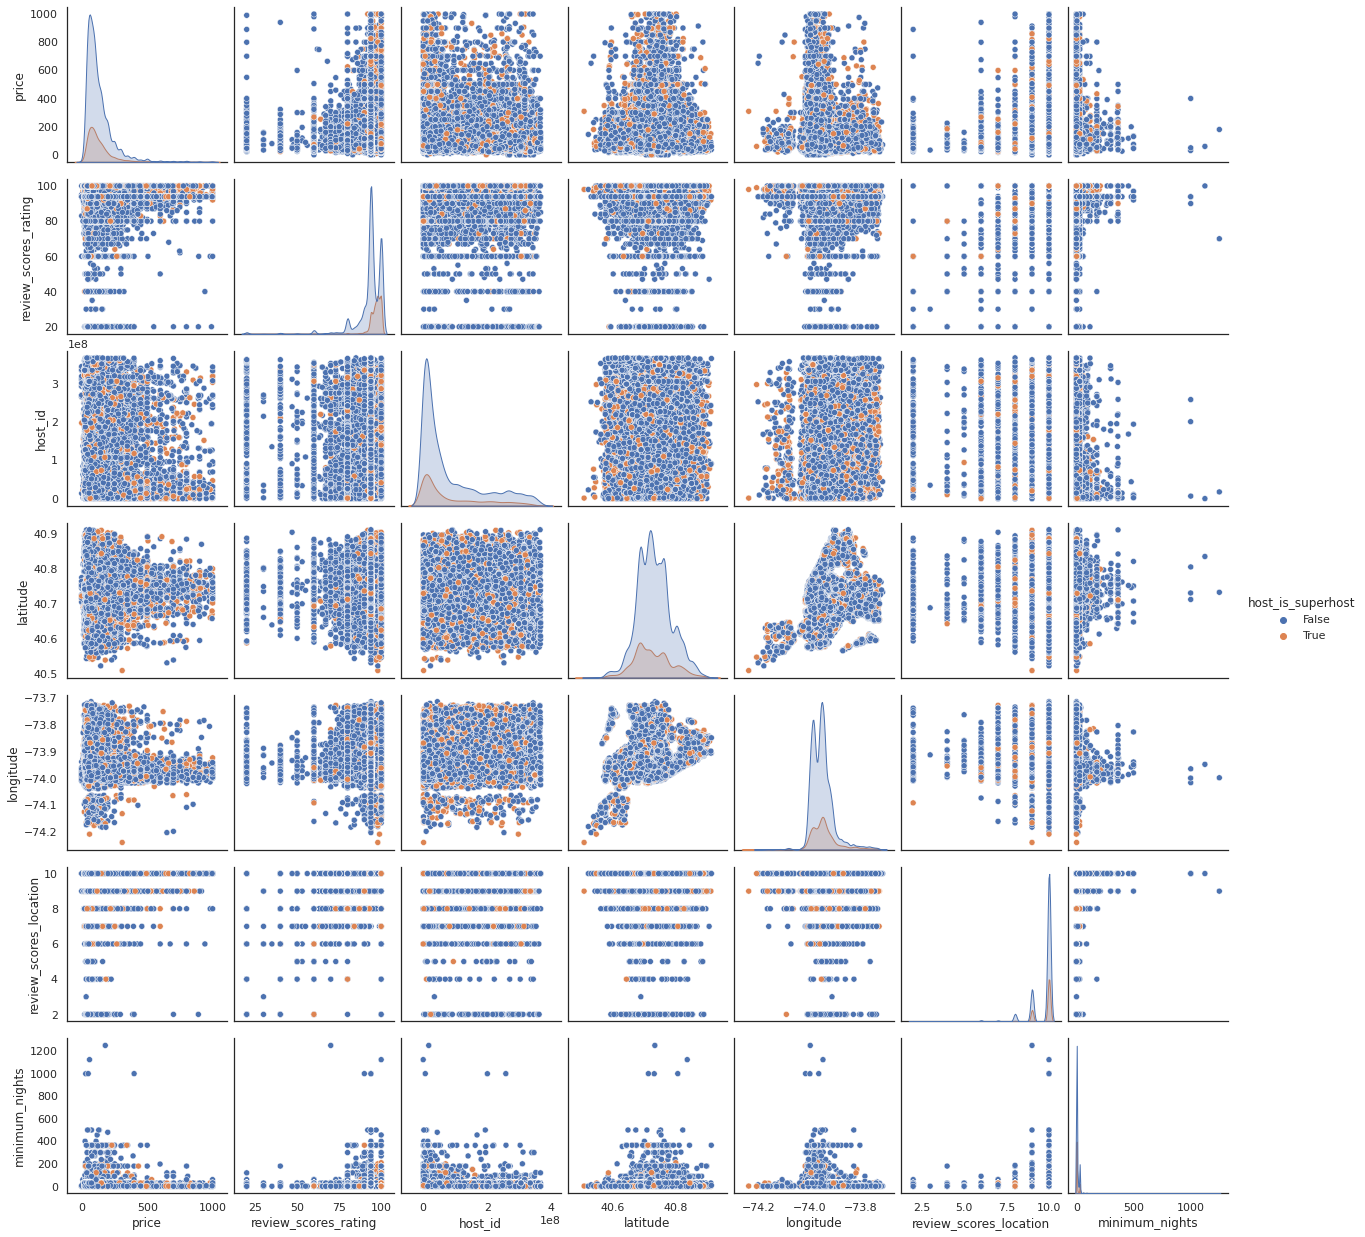

In [69]:
sns.pairplot(new_df, hue="host_is_superhost")
plt.show()

In [39]:
new_df[:20].groupby('host_is_superhost').agg({'price':'median', 'review_scores_rating': 'median', 'availability_365': 'mean',
                                            'number_of_reviews':'median','review_scores_location':'median'})

,price,review_scores_rating,availability_365,number_of_reviews,review_scores_location
host_is_superhost,,,,,
False,85.5,96.0,205.3125,86.5,10.0
True,128.5,94.5,195.0000,181.0,10.0


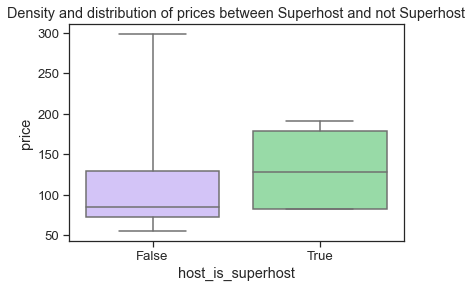

<Figure size 432x288 with 0 Axes>

In [67]:
first_20=new_df[:20]
sns.set(style="ticks", palette="pastel",font_scale=1.2)
viz_2=sns.boxplot(data=first_20, x='host_is_superhost', y='price', whis=3.0, palette=["m", "g"])
viz_2.set_title('Density and distribution of prices between Superhost and not Superhost');
# sns.despine()
plt.show()
plt.savefig('first_20Price', dpi=200);

In [32]:
#none_zero=new_df[new_df['price']>0]
#none_zero.groupby('host_is_superhost').agg({'price':'median'})

In [23]:
df_SH=new_df[new_df['host_is_superhost'].isin(['True'])]

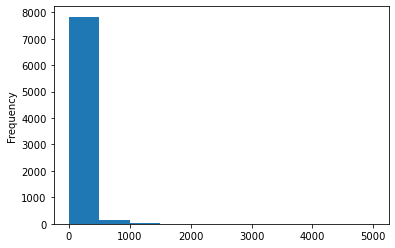

In [24]:
df_SH.price.plot(kind='hist');

In [25]:
df_NSH=new_df[new_df['host_is_superhost'].isin(['False'])]

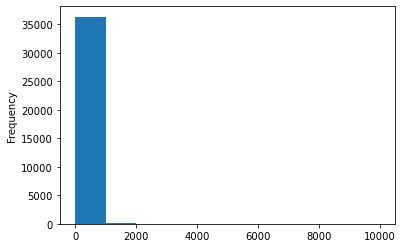

In [26]:
df_NSH.price.plot(kind='hist');

### Hypothesys testing! A Mann-Whitney U test (sometimes called the Wilcoxon rank-sum test) is used to compare the differences between two datasets when the size of two samples are not equal and data points are not normally distributed. 
## Since both of them match conditions above I will perform U-test.

In [27]:
SH=df_SH['price'].tolist()
len(SH)

8016

In [28]:
NSH=df_NSH['price'].tolist()
len(NSH)

36633

## I want to know how likely  a SUPERHOST bage leads to a higher listing's price on AIRBNB in NYC. I set null hypothesis:
$$Ho=SuperHostListingPriceTheSame,      
Ha=ListingPriceDifferent$$ 
### Significance level set for 5%, because of datasets sizes. $$a=0.05$$

In [31]:
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(SH[:500], NSH[:2500], alternative='two-sided')
print('stat=%.3f, p=%.5f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=649302.000, p=0.16923
Probably the same distribution


## Since p-value is higher  than alpha cut off level 0.05,  we can not reject  null hypothesis. We do have sufficient evidence to say that the true mean listings price  will be equal between two groups with having more observations.
## Lets take a closer look at the data set. 

In [23]:
#let's find out more about how listings price statistically distributed across our group.

#Superhost
sub_1=new_df.loc[new_df['host_is_superhost'] == 'True']
price_sub1=sub_1[['price']]
#Not a Superhost
sub_2=new_df.loc[new_df['host_is_superhost'] == 'False']
price_sub2=sub_2[['price']]
#putting all the prices' dfs in the list
price_list_by_b=[price_sub1, price_sub2]

In [24]:
#creating an empty list that we will append later with price distributions for each group
p_l_b_b_2=[]
#creating list with known values in group column
host_list=['True', 'False']
#creating a for loop to get statistics for price ranges and append it to our empty list
for x in price_list_by_b:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    p_l_b_b_2.append(i)
#changing names of the price column to the area name for easier reading of the table    
p_l_b_b_2[0].rename(columns={'price':host_list[0]}, inplace=True)
p_l_b_b_2[1].rename(columns={'price':host_list[1]}, inplace=True)
stat_df=p_l_b_b_2
stat_df=[df.set_index('Stats') for df in stat_df]
stat_df=stat_df[0].join(stat_df[1:])
stat_df

,True,False
Stats,,
min,0.0,0.0
25%,65.0,62.0
50%,100.0,100.0
75%,160.0,160.0
max,5000.0,10000.0


# We can observe no difference in listings price between two groups with bigger size dataset. 

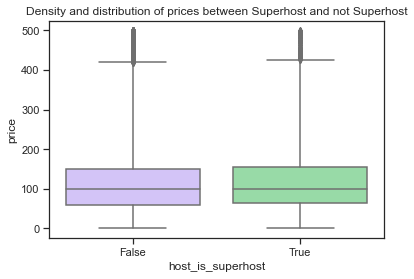

In [25]:
#using boxplot to showcase density and distribtuion of prices 
df=new_df[new_df.price<500]
sns.set(style="ticks", palette="pastel")
viz_2=sns.boxplot(data=df, x='host_is_superhost', y='price', whis=3.0, palette=["m", "g"])
viz_2.set_title('Density and distribution of prices between Superhost and not Superhost');
# sns.despine()
plt.show()

In [34]:
len(df)

43481